## CN-based clustering of patients

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform
import random
from deconveil.utils_plot import *
from deconveil.utils_clustering import *
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load data

DATA_PATH = "/Users/katsiarynadavydzenka/Documents/PhD_AI/DeConveil/datasets/clustering_test/"
gene_cnv = pd.read_csv(os.path.join(DATA_PATH, "cnv_tumor.csv"), index_col=0)
gene_cnv.head()

,TCGA-EW-A1P1-01A,TCGA-E2-A158-01A,TCGA-BH-A0C1-01B,TCGA-EW-A1IZ-01A,TCGA-S3-A6ZH-01A,TCGA-C8-A3M8-01A,TCGA-E9-A5FL-01A,TCGA-A1-A0SD-01A,TCGA-GM-A2DL-01A,TCGA-B6-A0RH-01A,...,TCGA-B6-A0WS-01A,TCGA-AR-A24Z-01A,TCGA-LD-A7W5-01A,TCGA-A2-A04V-01A,TCGA-BH-A0E7-01A,TCGA-AO-A0JL-01A,TCGA-AR-A256-01A,TCGA-E2-A14Z-01A,TCGA-AO-A0J2-01A,TCGA-V7-A7HQ-01A
TAF6L,2,2,3,2,2,2,4,1,2,2,...,2,3,3,2,2,4,3,3,4,2
SUN2,2,2,3,2,3,2,2,1,1,2,...,2,2,2,1,2,5,2,2,4,1
DNMBP-AS1,2,2,3,2,2,1,3,2,2,2,...,2,3,2,2,2,4,3,4,1,2
AC003973.1,2,2,4,2,3,2,4,2,2,2,...,2,4,3,2,2,6,4,1,4,2
SGK3,2,3,4,2,4,3,6,2,2,3,...,3,5,4,2,4,17,6,7,5,4


In [5]:
gene_cnv['cnv_mean'] = gene_cnv.mean(axis=1)
cnv_mean = gene_cnv['cnv_mean']
cnv_mean = pd.DataFrame(cnv_mean)
cnv_mean.head()

,cnv_mean
TAF6L,2.530476
SUN2,2.201905
DNMBP-AS1,2.384762
AC003973.1,2.663810
SGK3,3.550476


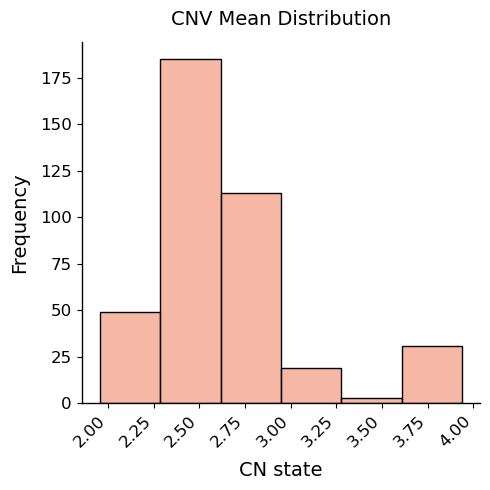

In [7]:
plot_cnv_hist(cnv_mean, binwidth=0.3)

### PCA + clustering

In [9]:
res_pca = pca_cluster_cn(gene_cnv, n_components=30, k=6, method="kmeans")
print(res_pca["labels"].value_counts())
print("Explained variance (first 5 PCs):", res_pca["explained_var"][:5])

1    408
5    190
3    163
0    152
4    104
2     34
Name: cluster, dtype: int64
Explained variance (first 5 PCs): [0.52904365 0.04356272 0.03516616 0.0271202  0.01567868]


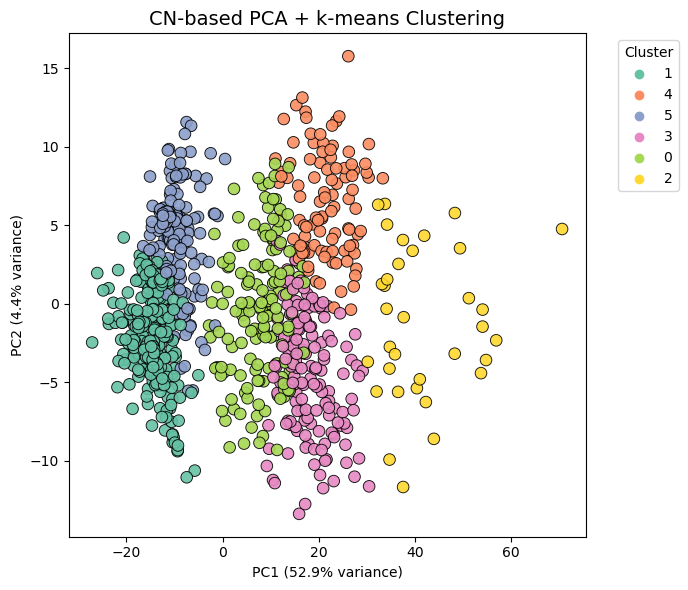

In [11]:
plot_pca_clusters(
    res_pca["pca_coords"], 
    res_pca["labels"], 
    res_pca["explained_var"],
    title="CN-based PCA + k-means Clustering"
)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


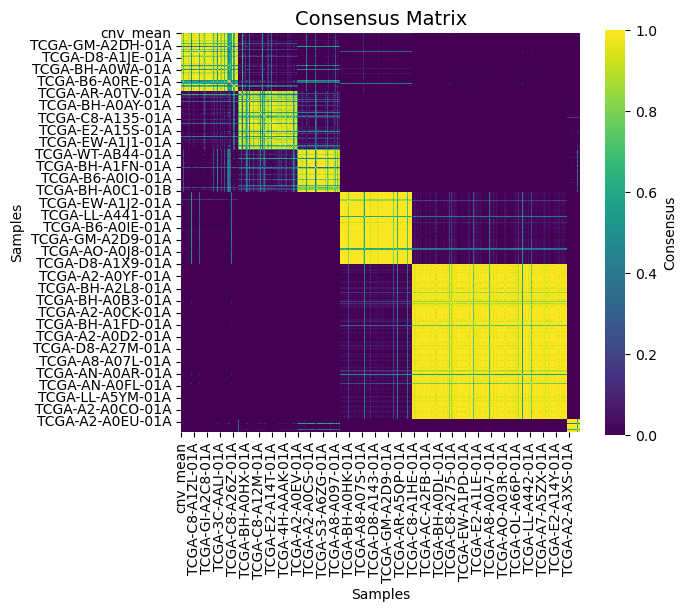

In [13]:
res_cons = consensus_cluster_cn(gene_cnv, k=6, n_resamples=100)
plot_consensus_matrix(res_cons["consensus_matrix"], res_cons["labels"])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

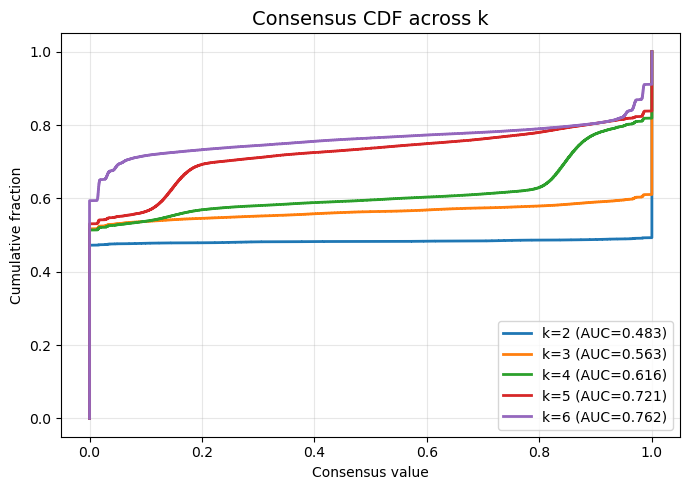

In [15]:
res_multi = consensus_cdf_range(
    gene_cnv,
    k_values=range(2,7),  # test k = 2..6
    n_resamples=100
)

In [19]:
# Check AUC values
for k, res in res_multi.items():
    print(f"k={k}: AUC={res['auc']:.3f}")

k=2: AUC=0.483
k=3: AUC=0.563
k=4: AUC=0.616
k=5: AUC=0.721
k=6: AUC=0.762
